# Feature Engineering (cont.)

In previous ML model, we built prediction models using base models and resampling technique. Now I am going to derive some features that potentially could assist with linear relationship with target variable.

In [160]:
# importing libraries
# main libraries
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.feature_selection import RFECV

import warnings
warnings.filterwarnings('ignore')

In [161]:
data = pd.read_csv('PrepChurnData.csv')
data.head()

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Female,Male,France,Germany,Spain
0,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,1,0,1,0,0
1,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,1,0,0,0,1
2,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,1,0,1,0,0
3,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,1,0,1,0,0
4,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,1,0,0,0,1


## Age Group

In [162]:
group = [18,20,30,40,50,60,70,93]
labels = ['<20', '20s', '30s','40s','50s','60s','>70']
data['Age_group']=pd.cut(data['Age'], bins=group, labels=labels, right=False)

## Balance/Salary Ratio

<AxesSubplot:ylabel='Density'>

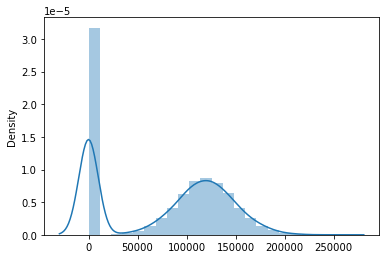

In [163]:
sns.distplot(x=data['Balance'])

### Handling zero values

In [164]:
data.loc[(data['Balance']==0) & (data['Exited']==1)]

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Complain,Satisfaction Score,Card Type,Point Earned,Female,Male,France,Germany,Spain,Age_group
0,15634602,Hargrave,619,42,2,0.0,1,1,1,101348.88,...,1,2,DIAMOND,464,1,0,1,0,0,40s
22,15699309,Gerasimov,510,38,4,0.0,1,1,0,118913.53,...,1,2,DIAMOND,887,1,0,0,0,1,30s
30,15589475,Azikiwe,591,39,3,0.0,3,1,0,140469.38,...,1,3,DIAMOND,298,1,0,0,0,1,30s
58,15623944,T'ien,511,66,4,0.0,1,1,0,1643.11,...,1,5,SILVER,549,1,0,0,0,1,60s
81,15663706,Leonard,777,32,2,0.0,1,1,0,136458.19,...,1,5,SILVER,917,1,0,1,0,0,30s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9784,15687626,Zhirov,527,39,4,0.0,2,1,0,167183.07,...,1,2,SILVER,567,0,1,1,0,0,30s
9884,15686974,Sergeyeva,751,48,4,0.0,1,0,1,30165.06,...,1,3,DIAMOND,591,1,0,1,0,0,40s
9898,15746569,Tsui,589,38,4,0.0,1,1,0,95483.48,...,1,5,DIAMOND,443,0,1,1,0,0,30s
9962,15594612,Flynn,702,44,9,0.0,1,0,0,59207.41,...,1,4,DIAMOND,977,0,1,0,0,1,40s


In [165]:
data.loc[data['Exited']==1]

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Complain,Satisfaction Score,Card Type,Point Earned,Female,Male,France,Germany,Spain,Age_group
0,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,...,1,2,DIAMOND,464,1,0,1,0,0,40s
2,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,...,1,3,DIAMOND,377,1,0,1,0,0,40s
5,15574012,Chu,645,44,8,113755.78,2,1,0,149756.71,...,1,5,DIAMOND,484,0,1,0,0,1,40s
7,15656148,Obinna,376,29,4,115046.74,4,1,0,119346.88,...,1,2,DIAMOND,282,1,0,0,1,0,20s
16,15737452,Romeo,653,58,1,132602.88,1,1,0,5097.67,...,0,2,SILVER,163,0,1,0,1,0,50s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,15672754,Burbidge,498,42,3,152039.70,1,1,1,53445.17,...,1,3,GOLD,790,0,1,0,1,0,40s
9982,15768163,Griffin,655,46,7,137145.12,1,1,0,115146.40,...,1,4,GOLD,591,1,0,0,1,0,40s
9991,15769959,Ajuluchukwu,597,53,4,88381.21,1,1,0,69384.71,...,1,3,GOLD,369,1,0,1,0,0,50s
9997,15584532,Liu,709,36,7,0.00,1,0,1,42085.58,...,1,3,SILVER,564,1,0,1,0,0,30s


In [166]:
zero_ratio_exit = data.loc[(data['Balance']==0) & (data['Exited']==1)].shape[0]/data.loc[data['Exited']==1].shape[0]
print('Customer with zero balance has {:.2f}% churn rate'.format(zero_ratio_exit*100))

Customer with zero balance has 24.53% churn rate


Let's make separate case for zero-balanced customer for analysis.

In [167]:
zero_df = data.loc[data['Balance']==0]
non_zero_df = data.loc[data['Balance']!=0]
print(zero_df.shape)
print(non_zero_df.shape)

(3617, 21)
(6383, 21)


# Analysis of Non-Zero Balance set

<AxesSubplot:ylabel='Density'>

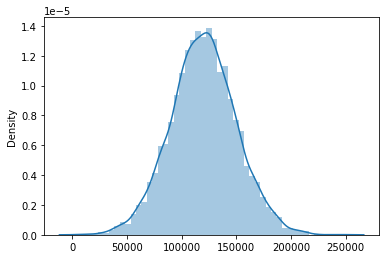

In [168]:
sns.distplot(x=non_zero_df['Balance'])

Now the balance is normally distributed

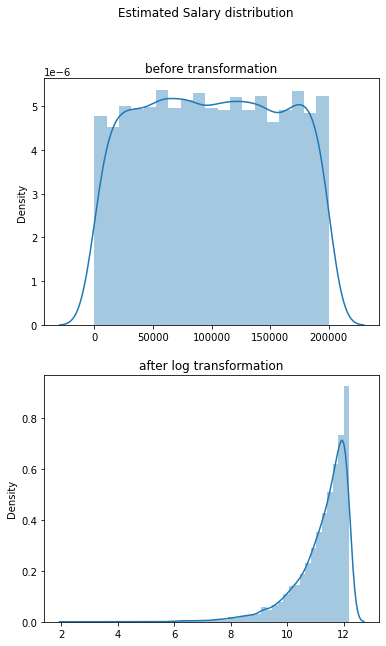

In [169]:
fig, axes = plt.subplots(2,1, figsize=(6,10))
# fig.tight_layout()
ax = sns.distplot(x=non_zero_df['EstimatedSalary'], ax=axes[0])
ax.set(title='before transformation')
ax = sns.distplot(x=np.log(non_zero_df['EstimatedSalary']), ax=axes[1])
ax.set(title='after log transformation')
plt.suptitle('Estimated Salary distribution')
plt.show()

After log transformation the distribution is left-skewed. We are going to keep the log transformation.

In [170]:
non_zero_df['log_EstimatedSalary']=np.log(non_zero_df['EstimatedSalary'])
non_zero_df['log_Balance']=np.log(non_zero_df['Balance'])

In [171]:
non_zero_df

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Card Type,Point Earned,Female,Male,France,Germany,Spain,Age_group,log_EstimatedSalary,log_Balance
1,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,...,DIAMOND,456,1,0,0,0,1,40s,11.631087,11.336282
2,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,...,DIAMOND,377,1,0,1,0,0,40s,11.643353,11.980807
4,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,...,GOLD,425,1,0,0,0,1,40s,11.278267,11.740147
5,15574012,Chu,645,44,8,113755.78,2,1,0,149756.71,...,DIAMOND,484,0,1,0,0,1,40s,11.916767,11.641809
7,15656148,Obinna,376,29,4,115046.74,4,1,0,119346.88,...,DIAMOND,282,1,0,0,1,0,20s,11.689789,11.653094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,15769959,Ajuluchukwu,597,53,4,88381.21,1,1,0,69384.71,...,GOLD,369,1,0,1,0,0,50s,11.147422,11.389415
9993,15569266,Rahman,644,28,7,155060.41,1,1,0,29179.52,...,DIAMOND,715,0,1,1,0,0,20s,10.281222,11.951570
9996,15569892,Johnstone,516,35,10,57369.61,1,1,1,101699.77,...,PLATINUM,771,0,1,1,0,0,30s,11.529780,10.957270
9998,15682355,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,...,GOLD,339,0,1,0,1,0,40s,11.439155,11.226247


In [172]:
non_zero_df.loc[non_zero_df['log_Balance']>non_zero_df['log_EstimatedSalary']]

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Card Type,Point Earned,Female,Male,France,Germany,Spain,Age_group,log_EstimatedSalary,log_Balance
2,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,...,DIAMOND,377,1,0,1,0,0,40s,11.643353,11.980807
4,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,...,GOLD,425,1,0,0,0,1,40s,11.278267,11.740147
8,15792365,He,501,44,4,142051.07,2,0,1,74940.50,...,GOLD,251,0,1,1,0,0,40s,11.224450,11.863942
9,15592389,H?,684,27,2,134603.88,1,1,1,71725.73,...,GOLD,342,0,1,1,0,0,20s,11.180605,11.810092
10,15767821,Bearce,528,31,6,102016.72,2,0,0,80181.12,...,GOLD,264,0,1,1,0,0,30s,11.292043,11.532892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,15581736,Bartlett,673,47,1,183579.54,2,0,1,34047.54,...,PLATINUM,772,0,1,0,1,0,40s,10.435513,12.120403
9987,15588839,Mancini,606,30,8,180307.73,2,1,1,1914.41,...,SILVER,567,0,1,0,0,1,30s,7.557165,12.102420
9991,15769959,Ajuluchukwu,597,53,4,88381.21,1,1,0,69384.71,...,GOLD,369,1,0,1,0,0,50s,11.147422,11.389415
9993,15569266,Rahman,644,28,7,155060.41,1,1,0,29179.52,...,DIAMOND,715,0,1,1,0,0,20s,10.281222,11.951570


### Creating Balance>Salary and Balance to Salary ratio columns

In [173]:
non_zero_df['Balance>Salary'] = np.where(non_zero_df['Balance'] > non_zero_df['EstimatedSalary'], 1, 0)
condition = np.where(non_zero_df['Balance']>non_zero_df['EstimatedSalary'], 1, non_zero_df['Balance']/non_zero_df['EstimatedSalary'])
non_zero_df['BalanceSalaryRatio'] = condition

In [174]:
non_zero_df

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Female,Male,France,Germany,Spain,Age_group,log_EstimatedSalary,log_Balance,Balance>Salary,BalanceSalaryRatio
1,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,...,1,0,0,0,1,40s,11.631087,11.336282,0,0.744677
2,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,...,1,0,1,0,0,40s,11.643353,11.980807,1,1.000000
4,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,...,1,0,0,0,1,40s,11.278267,11.740147,1,1.000000
5,15574012,Chu,645,44,8,113755.78,2,1,0,149756.71,...,0,1,0,0,1,40s,11.916767,11.641809,0,0.759604
7,15656148,Obinna,376,29,4,115046.74,4,1,0,119346.88,...,1,0,0,1,0,20s,11.689789,11.653094,0,0.963969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,15769959,Ajuluchukwu,597,53,4,88381.21,1,1,0,69384.71,...,1,0,1,0,0,50s,11.147422,11.389415,1,1.000000
9993,15569266,Rahman,644,28,7,155060.41,1,1,0,29179.52,...,0,1,1,0,0,20s,10.281222,11.951570,1,1.000000
9996,15569892,Johnstone,516,35,10,57369.61,1,1,1,101699.77,...,0,1,1,0,0,30s,11.529780,10.957270,0,0.564108
9998,15682355,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,...,0,1,0,1,0,40s,11.439155,11.226247,0,0.808230


## Loyalty (Tenure to Age)

In [175]:
non_zero_df['Loyalty'] = non_zero_df['Tenure']/non_zero_df['Age']
non_zero_df

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Male,France,Germany,Spain,Age_group,log_EstimatedSalary,log_Balance,Balance>Salary,BalanceSalaryRatio,Loyalty
1,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,...,0,0,0,1,40s,11.631087,11.336282,0,0.744677,0.024390
2,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,...,0,1,0,0,40s,11.643353,11.980807,1,1.000000,0.190476
4,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,...,0,0,0,1,40s,11.278267,11.740147,1,1.000000,0.046512
5,15574012,Chu,645,44,8,113755.78,2,1,0,149756.71,...,1,0,0,1,40s,11.916767,11.641809,0,0.759604,0.181818
7,15656148,Obinna,376,29,4,115046.74,4,1,0,119346.88,...,0,0,1,0,20s,11.689789,11.653094,0,0.963969,0.137931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,15769959,Ajuluchukwu,597,53,4,88381.21,1,1,0,69384.71,...,0,1,0,0,50s,11.147422,11.389415,1,1.000000,0.075472
9993,15569266,Rahman,644,28,7,155060.41,1,1,0,29179.52,...,1,1,0,0,20s,10.281222,11.951570,1,1.000000,0.250000
9996,15569892,Johnstone,516,35,10,57369.61,1,1,1,101699.77,...,1,1,0,0,30s,11.529780,10.957270,0,0.564108,0.285714
9998,15682355,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,...,1,0,1,0,40s,11.439155,11.226247,0,0.808230,0.071429


<AxesSubplot:xlabel='Loyalty', ylabel='Count'>

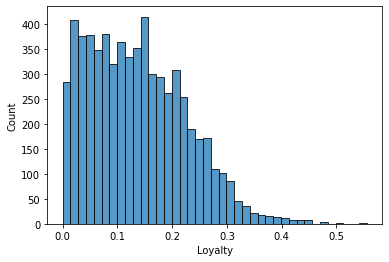

In [176]:
sns.histplot(x=non_zero_df['Loyalty'])

# Credit Score, Point Earned, Satisfaction Score, NumOfProducts

<AxesSubplot:ylabel='Density'>

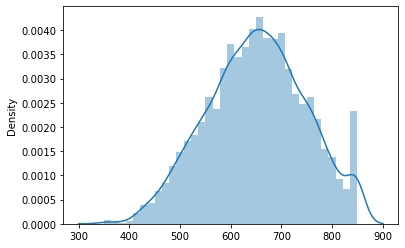

In [177]:
sns.distplot(x=non_zero_df['CreditScore'])

<AxesSubplot:ylabel='Density'>

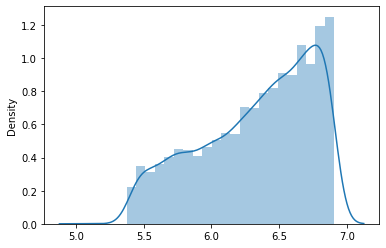

In [178]:
sns.distplot(x=np.log(non_zero_df['Point Earned']))

<AxesSubplot:ylabel='Density'>

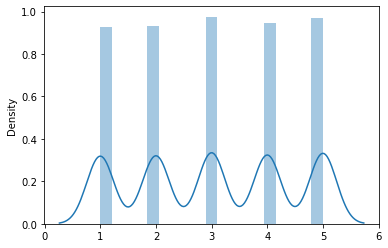

In [179]:
sns.distplot(x=non_zero_df['Satisfaction Score'])

<AxesSubplot:ylabel='Density'>

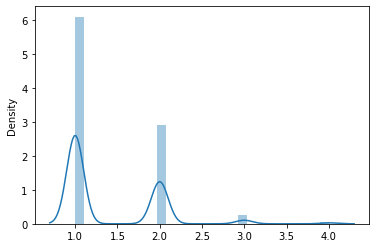

In [180]:
sns.distplot(x=non_zero_df['NumOfProducts'])

Log transform on point earned

In [181]:
non_zero_df['log_Point_Earned'] = np.log(non_zero_df['Point Earned'])
non_zero_df

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,France,Germany,Spain,Age_group,log_EstimatedSalary,log_Balance,Balance>Salary,BalanceSalaryRatio,Loyalty,log_Point_Earned
1,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,...,0,0,1,40s,11.631087,11.336282,0,0.744677,0.024390,6.122493
2,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,...,1,0,0,40s,11.643353,11.980807,1,1.000000,0.190476,5.932245
4,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,...,0,0,1,40s,11.278267,11.740147,1,1.000000,0.046512,6.052089
5,15574012,Chu,645,44,8,113755.78,2,1,0,149756.71,...,0,0,1,40s,11.916767,11.641809,0,0.759604,0.181818,6.182085
7,15656148,Obinna,376,29,4,115046.74,4,1,0,119346.88,...,0,1,0,20s,11.689789,11.653094,0,0.963969,0.137931,5.641907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,15769959,Ajuluchukwu,597,53,4,88381.21,1,1,0,69384.71,...,1,0,0,50s,11.147422,11.389415,1,1.000000,0.075472,5.910797
9993,15569266,Rahman,644,28,7,155060.41,1,1,0,29179.52,...,1,0,0,20s,10.281222,11.951570,1,1.000000,0.250000,6.572283
9996,15569892,Johnstone,516,35,10,57369.61,1,1,1,101699.77,...,1,0,0,30s,11.529780,10.957270,0,0.564108,0.285714,6.647688
9998,15682355,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,...,0,1,0,40s,11.439155,11.226247,0,0.808230,0.071429,5.826000


## Splitting features and target

In [182]:
non_zero_df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Card Type', 'Point Earned',
       'Female', 'Male', 'France', 'Germany', 'Spain', 'Age_group',
       'log_EstimatedSalary', 'log_Balance', 'Balance>Salary',
       'BalanceSalaryRatio', 'Loyalty', 'log_Point_Earned'],
      dtype='object')

In [216]:
X = non_zero_df[['NumOfProducts','CreditScore', 'Age', 'Tenure','Age_group','log_EstimatedSalary', 
                 'log_Balance','BalanceSalaryRatio', 'Loyalty', 'log_Point_Earned', 
                 'IsActiveMember','Female', 'Male','Germany', 'Balance>Salary','Complain']]
y = non_zero_df['Exited']

In [217]:
X = pd.get_dummies(X)

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=2)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (5106, 22)
X_test shape: (1277, 22)


In [219]:
X_train

,NumOfProducts,CreditScore,Age,Tenure,log_EstimatedSalary,log_Balance,BalanceSalaryRatio,Loyalty,log_Point_Earned,IsActiveMember,...,Germany,Balance>Salary,Complain,Age_group_<20,Age_group_20s,Age_group_30s,Age_group_40s,Age_group_50s,Age_group_60s,Age_group_>70
1024,1,718,25,4,11.051381,11.596273,1.000000,0.160000,6.583409,0,...,0,1,0,0,1,0,0,0,0,0
5000,2,834,68,9,11.441560,11.776591,1.000000,0.132353,6.782192,1,...,1,1,0,0,0,0,0,0,1,0
688,1,625,51,7,10.567913,11.822577,1.000000,0.137255,6.725034,0,...,0,1,1,0,0,0,0,1,0,0
7242,3,664,44,7,10.956729,11.258377,1.000000,0.159091,5.826000,0,...,0,1,1,0,0,0,1,0,0,0
9206,1,624,52,0,8.488709,11.803529,1.000000,0.000000,6.214608,0,...,1,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704,1,654,29,4,11.859377,11.482208,0.685800,0.137931,5.834811,1,...,0,0,0,0,1,0,0,0,0,0
3878,2,526,32,6,7.493278,11.790094,1.000000,0.187500,6.025866,1,...,1,1,0,0,0,1,0,0,0,0
5627,1,654,29,4,11.896248,11.797763,0.906210,0.137931,6.697034,1,...,0,0,0,0,1,0,0,0,0,0
8952,1,565,47,10,12.018836,11.847654,0.842668,0.212766,5.455321,0,...,1,0,1,0,0,0,1,0,0,0


In [220]:
scaler = StandardScaler()

train_num_f=pd.DataFrame(scaler.fit_transform(X_train[X_train.columns[:9]]),index=X_train.index,columns=X_train.columns[:9])
test_num_f=pd.DataFrame(scaler.fit_transform(X_test[X_test.columns[:9]]),index=X_test.index,columns=X_test.columns[:9])

scaler = MinMaxScaler()

train_num_f=pd.DataFrame(scaler.fit_transform(train_num_f),index=train_num_f.index,columns=train_num_f.columns)
test_num_f=pd.DataFrame(scaler.fit_transform(test_num_f),index=test_num_f.index, columns=test_num_f.columns)

X_train = pd.concat([train_num_f,X_train[X_train.columns[9:]]], axis=1)
X_test = pd.concat([test_num_f,X_test[X_test.columns[9:]]], axis=1)

X_train.head()

,NumOfProducts,CreditScore,Age,Tenure,log_EstimatedSalary,log_Balance,BalanceSalaryRatio,Loyalty,log_Point_Earned,IsActiveMember,...,Germany,Balance>Salary,Complain,Age_group_<20,Age_group_20s,Age_group_30s,Age_group_40s,Age_group_50s,Age_group_60s,Age_group_>70
1024,0.000000,0.736,0.094595,0.4,0.881666,0.721397,1.0,0.288000,0.821199,0,...,0,1,0,0,1,0,0,0,0,0
5000,0.333333,0.968,0.675676,0.9,0.921657,0.781452,1.0,0.238235,0.930781,1,...,1,1,0,0,0,0,0,0,1,0
688,0.000000,0.550,0.445946,0.7,0.832113,0.796767,1.0,0.247059,0.899272,0,...,0,1,1,0,0,0,0,1,0,0
7242,0.666667,0.628,0.351351,0.7,0.871964,0.608862,1.0,0.286364,0.403665,0,...,0,1,1,0,0,0,1,0,0,0
9206,0.000000,0.548,0.459459,0.0,0.619007,0.790423,1.0,0.000000,0.617891,0,...,1,1,1,0,0,0,0,1,0,0


## Building Models

In this notebook, I will use Optuna to tune the hyperparameters and find the best one. Then, for the best model, I will use SHAP to explain which features influence churn customers.

In [221]:
def plot_cm(y_hat):
    matrix = confusion_matrix(y_hat, y_test)
    ax = sns.heatmap(matrix, annot=True, fmt='d', cmap='crest')
    ax.set(xlabel='Predicted values', ylabel='Actual Values',
           xticklabels=['Did not churn', 'Churn'], yticklabels=['Did not churn', 'Churn'])
    plt.show()

In [222]:
def plot_roc_curve(positive_probs):
    fpr, tpr, _ = roc_curve(y_test.astype('float'), positive_probs)
    plt.plot([0, 1], [0, 1], linestyle='--', label='No Algorithm')
    plt.plot(fpr, tpr, marker='.', label='With Algorithm')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

In [223]:
def evaluate_model(model):
    y_hat = model.predict(X_test)
    y_hat_train = model.predict(X_train)
    pos_probs = model.predict_proba(X_test)[:, 1]
    acc = accuracy_score(y_hat, y_test)
    train_acc = accuracy_score(y_hat_train, y_train)
    roc = roc_auc_score(y_test, pos_probs)
    print(f'Train Accuracy: {train_acc}')
    print(f'Test Accuracy: {acc}')
    print(f'ROC: {roc}')
    print(classification_report(y_hat, y_test))
    plot_cm(y_hat)
    plot_roc_curve(pos_probs)

## Random Forest

In [224]:
import optuna
def objective_rf(trial):
    parameters = {
        'n_estimators':trial.suggest_int('n_estimators', 150, 350, step=50),
        'max_depth':trial.suggest_int('max_depth', 4, 8),
        'min_samples_split':trial.suggest_int('min_samples_split', 3, 10),
        'min_samples_leaf':trial.suggest_int('min_samples_leaf',1,10),
        'max_features':trial.suggest_int('max_features', 1, 22),
        'bootstrap':trial.suggest_categorical('bootstrap', [True, False]),
        'class_weight':trial.suggest_categorical('class_weight', [{0:1, 1:1}, {0:1,1:2}, {0:1, 1:5}]),
    }
    model = RandomForestClassifier(**parameters, random_state=2)
    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    f1 = classification_report(y_hat, y_test, output_dict=True)['1']['f1-score']
    return f1

In [225]:
study = optuna.create_study(direction='maximize')
study.optimize(objective_rf, n_trials=35)
best_params = study.best_params
best_value = study.best_value

[I 2023-07-02 13:40:42,949] A new study created in memory with name: no-name-94aeca53-23cd-4ca9-94d6-0c36cec09bee
[I 2023-07-02 13:40:48,127] Trial 0 finished with value: 0.9728915662650602 and parameters: {'n_estimators': 350, 'max_depth': 6, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_features': 19, 'bootstrap': False, 'class_weight': {0: 1, 1: 5}}. Best is trial 0 with value: 0.9728915662650602.
[I 2023-07-02 13:40:49,012] Trial 1 finished with value: 0.6815415821501014 and parameters: {'n_estimators': 300, 'max_depth': 5, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_features': 1, 'bootstrap': False, 'class_weight': {0: 1, 1: 1}}. Best is trial 0 with value: 0.9728915662650602.
[I 2023-07-02 13:40:50,887] Trial 2 finished with value: 0.9969135802469136 and parameters: {'n_estimators': 300, 'max_depth': 8, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': 4, 'bootstrap': False, 'class_weight': {0: 1, 1: 5}}. Best is trial 2 with value: 0.9969135802469136.


[I 2023-07-02 13:41:52,233] Trial 28 finished with value: 0.9969135802469136 and parameters: {'n_estimators': 350, 'max_depth': 8, 'min_samples_split': 10, 'min_samples_leaf': 6, 'max_features': 19, 'bootstrap': True, 'class_weight': {0: 1, 1: 2}}. Best is trial 2 with value: 0.9969135802469136.
[I 2023-07-02 13:41:56,706] Trial 29 finished with value: 0.9728915662650602 and parameters: {'n_estimators': 300, 'max_depth': 7, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_features': 19, 'bootstrap': False, 'class_weight': {0: 1, 1: 5}}. Best is trial 2 with value: 0.9969135802469136.
[I 2023-07-02 13:42:00,938] Trial 30 finished with value: 0.9969135802469136 and parameters: {'n_estimators': 350, 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 9, 'max_features': 15, 'bootstrap': False, 'class_weight': {0: 1, 1: 5}}. Best is trial 2 with value: 0.9969135802469136.
[I 2023-07-02 13:42:02,833] Trial 31 finished with value: 0.9969135802469136 and parameters: {'n_estimators':

In [226]:
print('the best parameters are: ', best_params)
print('The best score is: ', best_value)

the best parameters are:  {'n_estimators': 300, 'max_depth': 8, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': 4, 'bootstrap': False, 'class_weight': {0: 1, 1: 5}}
The best score is:  0.9969135802469136


Train Accuracy: 0.9982373678025852
Test Accuracy: 0.9984338292873923
ROC: 0.9957692307692309
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       954
           1       0.99      1.00      1.00       323

    accuracy                           1.00      1277
   macro avg       1.00      1.00      1.00      1277
weighted avg       1.00      1.00      1.00      1277



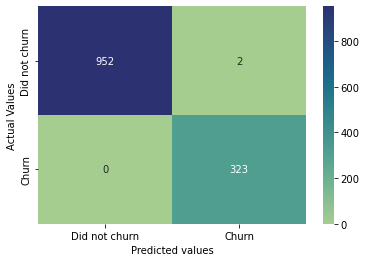

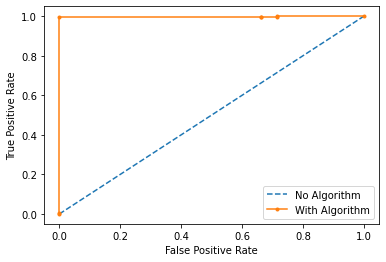

In [227]:
rfc = RandomForestClassifier(**best_params, random_state=2)
rfc.fit(X_train, y_train)
evaluate_model(rfc)

## Gradient Boosting

In [238]:
def objective_gb(trial):
    parameters = {
        'n_estimators':trial.suggest_int('n_estimators', 150, 350, step=50),
        'learning_rate':trial.suggest_float('learning_rate', 0.01, 0.2),
        'subsample':trial.suggest_float('subsample', 0, 1),
        'max_depth':trial.suggest_int('max_depth',2,10),
        'max_features':trial.suggest_int('max_features', 3, 21, step=2),
        'min_samples_split':trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf':trial.suggest_int('min_samples_leaf',1,10),
        'criterion':trial.suggest_categorical('criterion',['friedman_mse','squared_error'])
    }
    model = GradientBoostingClassifier(**parameters, random_state=2)
    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    f1 = classification_report(y_hat, y_test, output_dict=True)['1']['f1-score']
    return f1

In [239]:
study = optuna.create_study(direction='maximize')
study.optimize(objective_gb, n_trials=35)
best_params = study.best_params
best_value = study.best_value

[I 2023-07-02 14:00:56,836] A new study created in memory with name: no-name-b387cd77-4f49-4983-98d7-01068e60b06b
[I 2023-07-02 14:00:59,584] Trial 0 finished with value: 0.9969135802469136 and parameters: {'n_estimators': 350, 'learning_rate': 0.014148442129751389, 'subsample': 0.6417069887893982, 'max_depth': 5, 'max_features': 7, 'min_samples_split': 5, 'min_samples_leaf': 3, 'criterion': 'friedman_mse'}. Best is trial 0 with value: 0.9969135802469136.
[I 2023-07-02 14:01:00,919] Trial 1 finished with value: 0.9832572298325724 and parameters: {'n_estimators': 200, 'learning_rate': 0.1513911940638583, 'subsample': 0.548465330274598, 'max_depth': 3, 'max_features': 13, 'min_samples_split': 10, 'min_samples_leaf': 5, 'criterion': 'friedman_mse'}. Best is trial 0 with value: 0.9969135802469136.
[I 2023-07-02 14:01:01,871] Trial 2 finished with value: 0.48576214405360135 and parameters: {'n_estimators': 350, 'learning_rate': 0.11672201880645158, 'subsample': 0.026075804497936228, 'max_de

[I 2023-07-02 14:02:05,839] Trial 24 finished with value: 0.9969135802469136 and parameters: {'n_estimators': 300, 'learning_rate': 0.011507850802618456, 'subsample': 0.15426098212609385, 'max_depth': 8, 'max_features': 11, 'min_samples_split': 8, 'min_samples_leaf': 2, 'criterion': 'friedman_mse'}. Best is trial 0 with value: 0.9969135802469136.
[I 2023-07-02 14:02:08,100] Trial 25 finished with value: 0.9969135802469136 and parameters: {'n_estimators': 250, 'learning_rate': 0.027113144532738935, 'subsample': 0.35006509998504165, 'max_depth': 7, 'max_features': 7, 'min_samples_split': 4, 'min_samples_leaf': 3, 'criterion': 'friedman_mse'}. Best is trial 0 with value: 0.9969135802469136.
[I 2023-07-02 14:02:13,518] Trial 26 finished with value: 0.9969135802469136 and parameters: {'n_estimators': 350, 'learning_rate': 0.033125671427118863, 'subsample': 0.4553142781666686, 'max_depth': 9, 'max_features': 9, 'min_samples_split': 6, 'min_samples_leaf': 1, 'criterion': 'squared_error'}. Bes

In [240]:
print('the best parameters are: ', best_params)
print('The best score is: ', best_value)

the best parameters are:  {'n_estimators': 350, 'learning_rate': 0.014148442129751389, 'subsample': 0.6417069887893982, 'max_depth': 5, 'max_features': 7, 'min_samples_split': 5, 'min_samples_leaf': 3, 'criterion': 'friedman_mse'}
The best score is:  0.9969135802469136


Train Accuracy: 0.9984332158245202
Test Accuracy: 0.9984338292873923
ROC: 0.9956528765352294
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       954
           1       0.99      1.00      1.00       323

    accuracy                           1.00      1277
   macro avg       1.00      1.00      1.00      1277
weighted avg       1.00      1.00      1.00      1277



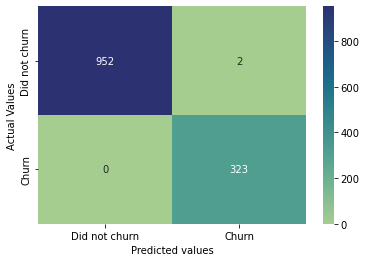

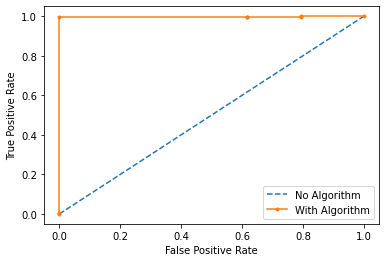

In [241]:
gb = GradientBoostingClassifier(**best_params, random_state=2)
gb.fit(X_train, y_train)
evaluate_model(gb)

## XGBoost

In [242]:
cols = X_train.columns.to_list()
cols_dict = dict.fromkeys(cols)
for i in cols:
    cols_dict[i] = ''.join(e for e in i if e.isalnum())
X_train.rename(columns=cols_dict, inplace=True)

In [243]:
cols = X_test.columns.to_list()
cols_dict = dict.fromkeys(cols)
for i in cols:
    cols_dict[i] = ''.join(e for e in i if e.isalnum())
X_test.rename(columns=cols_dict, inplace=True)

In [244]:
def objective_xgb(trial):
    parameters = {
        'n_estimators':trial.suggest_int('n_estimators', 100, 500, step=100),
        'learning_rate':trial.suggest_float('learning_rate', 0.01, 0.2),
        'subsample':trial.suggest_float('subsample', 0, 1),
        'max_depth':trial.suggest_int('max_depth',2,10),
        'reg_alpha':trial.suggest_float('reg_alpha', 0, 1),
        'colsample_bytree':trial.suggest_float('colsample_bytree', 0.3, 1),
        'min_child_weight':trial.suggest_int('min_child_weight',1,20),
        'gamma':trial.suggest_float('gamma',0,1),
        'scale_pos_weight':trial.suggest_float('scale_pos_weight', 1,5),
    }
    model = XGBClassifier(**parameters, random_state=2)
    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    f1 = classification_report(y_hat, y_test, output_dict=True)['1']['f1-score']
    return f1

In [245]:
study = optuna.create_study(direction='maximize')
study.optimize(objective_xgb, n_trials=35)
best_params = study.best_params
best_value = study.best_value

[I 2023-07-02 14:02:45,266] A new study created in memory with name: no-name-57f03ab9-94d7-43a4-bfe9-ab69fc75f83c
[I 2023-07-02 14:02:45,697] Trial 0 finished with value: 0.0 and parameters: {'n_estimators': 400, 'learning_rate': 0.06891917434151726, 'subsample': 0.013026933699108123, 'max_depth': 6, 'reg_alpha': 0.7228286465701667, 'colsample_bytree': 0.8735075932805314, 'min_child_weight': 15, 'gamma': 0.23963824654109322, 'scale_pos_weight': 2.046954133629623}. Best is trial 0 with value: 0.0.
[I 2023-07-02 14:02:46,810] Trial 1 finished with value: 0.9969135802469136 and parameters: {'n_estimators': 500, 'learning_rate': 0.04774074749280809, 'subsample': 0.2343512946081936, 'max_depth': 10, 'reg_alpha': 0.3098638170055257, 'colsample_bytree': 0.36068465300160435, 'min_child_weight': 1, 'gamma': 0.6058853383330796, 'scale_pos_weight': 2.5259655405171046}. Best is trial 1 with value: 0.9969135802469136.
[I 2023-07-02 14:02:47,313] Trial 2 finished with value: 0.9969135802469136 and p

[I 2023-07-02 14:02:55,157] Trial 20 finished with value: 0.9969135802469136 and parameters: {'n_estimators': 400, 'learning_rate': 0.13226404246560852, 'subsample': 0.2162603971847309, 'max_depth': 5, 'reg_alpha': 0.32778940411057206, 'colsample_bytree': 0.6302438753146848, 'min_child_weight': 3, 'gamma': 0.8572229405153553, 'scale_pos_weight': 1.7543191748479816}. Best is trial 1 with value: 0.9969135802469136.
[I 2023-07-02 14:02:55,366] Trial 21 finished with value: 0.9969135802469136 and parameters: {'n_estimators': 100, 'learning_rate': 0.10989766450123714, 'subsample': 0.2959869362189326, 'max_depth': 10, 'reg_alpha': 0.6889446653042953, 'colsample_bytree': 0.794961364593946, 'min_child_weight': 13, 'gamma': 0.3809005321652747, 'scale_pos_weight': 2.480077648909887}. Best is trial 1 with value: 0.9969135802469136.
[I 2023-07-02 14:02:55,640] Trial 22 finished with value: 0.9969135802469136 and parameters: {'n_estimators': 200, 'learning_rate': 0.12732291174015428, 'subsample': 0

In [246]:
print('the best parameters are: ', best_params)
print('The best score is: ', best_value)

the best parameters are:  {'n_estimators': 500, 'learning_rate': 0.04774074749280809, 'subsample': 0.2343512946081936, 'max_depth': 10, 'reg_alpha': 0.3098638170055257, 'colsample_bytree': 0.36068465300160435, 'min_child_weight': 1, 'gamma': 0.6058853383330796, 'scale_pos_weight': 2.5259655405171046}
The best score is:  0.9969135802469136


Train Accuracy: 0.9978456717587152
Test Accuracy: 0.9984338292873923
ROC: 0.9951551389786684
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       954
           1       0.99      1.00      1.00       323

    accuracy                           1.00      1277
   macro avg       1.00      1.00      1.00      1277
weighted avg       1.00      1.00      1.00      1277



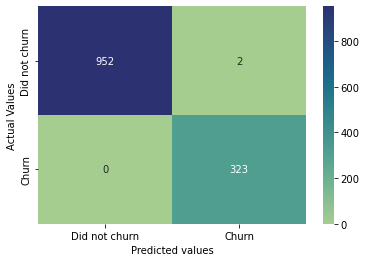

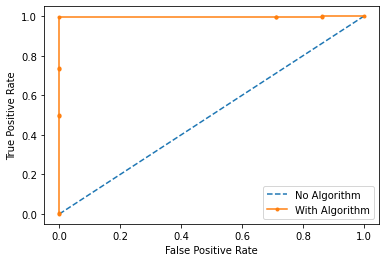

In [247]:
xgb = XGBClassifier(**best_params, random_state=2)
xgb.fit(X_train, y_train)
evaluate_model(xgb)

# Feature Importance

In [207]:
import shap

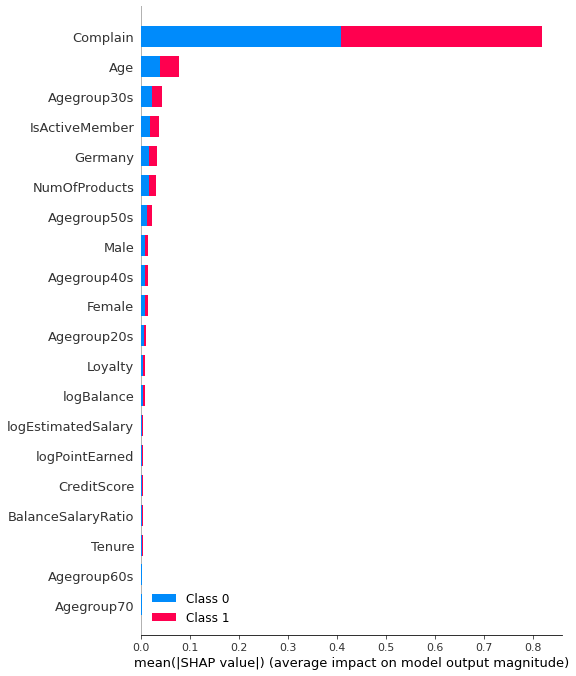

In [248]:
# using rfc as our final model
explainer = shap.Explainer(rfc)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

In [236]:
sort_indices = rfc.feature_importances_.argsort()

fi = pd.DataFrame({'feature':X_train.columns,'value':rfc.feature_importances_})
fi[fi['value']>0.05]

,feature,value
0,NumOfProducts,0.031289
1,CreditScore,0.003559
2,Age,0.063611
3,Tenure,0.002355
4,log_EstimatedSalary,0.004858
5,log_Balance,0.009024
6,BalanceSalaryRatio,0.002748
7,Loyalty,0.006962
8,log_Point_Earned,0.004539
9,IsActiveMember,0.013038


Overall, the performance for Random Forest (RF), Gradient Boosting (GB), XGBoost (XGB) are similar with drop/increase difference in precision and recall. I wanted to focus on the scores for class `1` because that is what we wanted to predict. Speaking about the class `0`, the scores have increased slightly, with significantly higher precision but lower sensitivity. This notebook also takes consideration of imbalanced data set.

For the class `1`, precision scores have dropped significantly compared to the pre-model. However, the sensitivity has increased significantly. This means that the model power to predict correct churn customers has increased greatly. As a result, the model can predict churn customers when actually the customers did not churn and churn. The problem occurs here. While the model can avoid misclassifying customers that did not churn, it tends to classify churn customers to not churn customers. However the f1-score is still the same with before. 

In conclusion, there is an improvement performance-wise. This model is able to avoid misclassifying churning customers as not churn. However, the model now tends to classify customer that did not churn as churn. I chose RF model in this case for our ultimate model. The performance is more stable on both class, but XGB also performs well and balanced which can also be a candidate.

Current model performance (RandomForest)

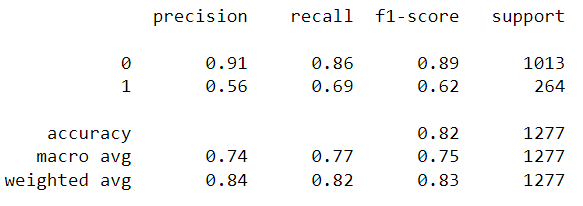

Confusion matrix for RandomForest:

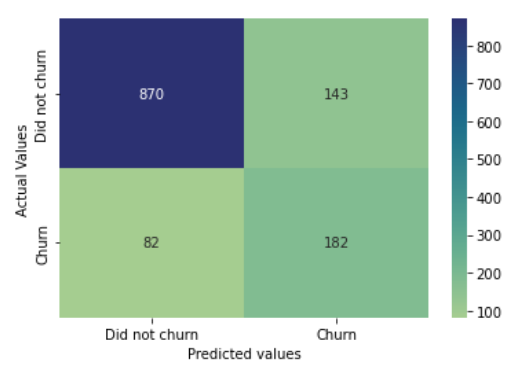

## Predicting Complaining Customers

We know that in this data, `Complain` is the main driver for churn customers. So, we might as well explore which customers segmentation are likely to complain. This can be useful to prevent high-churn customers. 

<AxesSubplot:xlabel='Exited', ylabel='count'>

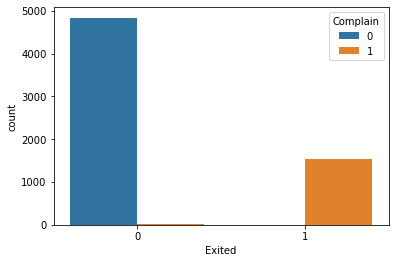

In [43]:
sns.countplot(x=non_zero_df['Exited'], hue=non_zero_df['Complain'])

More churn customers are located in complaining customers

In [53]:
non_zero_df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,...,Male,France,Germany,Spain,log_EstimatedSalary,log_Balance,Balance>Salary,Balance_Salary,Loyalty,log_Point_Earned
count,6.383000e+03,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,...,6383.000000,6383.000000,6383.000000,6383.000000,6.383000e+03,6.383000e+03,6383.000000,6383.000000,6383.000000,6383.000000
mean,1.569037e+07,651.138493,39.197713,4.979633,119827.493793,1.386025,0.699201,0.513552,100717.352956,0.240953,...,0.547392,0.406705,0.393075,0.200219,4.574474e-17,8.162740e-15,0.594391,0.885347,0.135648,6.332133
std,7.192913e+04,96.934609,10.476208,2.909514,30095.056462,0.577011,0.458641,0.499855,57380.316584,0.427695,...,0.497788,0.491257,0.488472,0.400196,1.000078e+00,1.000078e+00,0.491048,0.175933,0.088667,0.417733
min,1.556570e+07,350.000000,18.000000,0.000000,3768.690000,1.000000,0.000000,0.000000,11.580000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-8.989514e+00,-1.215471e+01,0.000000,0.021284,0.000000,5.093750
25%,1.562820e+07,584.000000,32.000000,2.000000,100181.975000,1.000000,0.000000,0.000000,51736.850000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-3.802535e-01,-5.087158e-01,0.000000,0.784526,0.062500,6.018593
50%,1.568953e+07,652.000000,38.000000,5.000000,119839.690000,1.000000,1.000000,1.000000,101139.300000,0.000000,...,1.000000,0.000000,0.000000,0.000000,3.063945e-01,1.273844e-01,1.000000,1.000000,0.128205,6.415097
75%,1.575311e+07,718.000000,44.000000,8.000000,139512.290000,2.000000,1.000000,1.000000,149596.615000,0.000000,...,1.000000,1.000000,1.000000,0.000000,7.073680e-01,6.670262e-01,1.000000,1.000000,0.195652,6.688355
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199970.740000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.004662e+00,2.750692e+00,1.000000,1.000000,0.555556,6.907755


In [211]:
# Highest correlation with complain
non_zero_df.corr().sort_values('Complain', ascending=False)['Complain']

Complain               1.000000
Exited                 0.994441
Age                    0.299226
Germany                0.159190
Female                 0.112204
NumOfProducts          0.080143
Balance                0.017225
log_Balance            0.011621
log_Point_Earned       0.009396
Point Earned           0.009004
EstimatedSalary        0.007392
Tenure                -0.000324
log_EstimatedSalary   -0.001214
HasCrCard             -0.002288
Balance>Salary        -0.007561
Satisfaction Score    -0.007914
BalanceSalaryRatio    -0.007981
CustomerId            -0.008367
CreditScore           -0.030888
Spain                 -0.053896
Male                  -0.112204
France                -0.114382
Loyalty               -0.114979
IsActiveMember        -0.170153
Name: Complain, dtype: float64

### Exploring Multicolinearity

In [60]:
non_zero_df.dtypes

CustomerId                int64
Surname                  object
CreditScore               int64
Age                       int64
Tenure                    int64
Balance                 float64
NumOfProducts             int64
HasCrCard                 int64
IsActiveMember            int64
EstimatedSalary         float64
Exited                    int64
Complain                  int64
Satisfaction Score        int64
Card Type                object
Point Earned              int64
Female                    int64
Male                      int64
France                    int64
Germany                   int64
Spain                     int64
Age_group              category
log_EstimatedSalary     float64
log_Balance             float64
Balance>Salary            int32
Balance_Salary          float64
Loyalty                 float64
log_Point_Earned        float64
dtype: object

In [212]:
# extracting numerical features
num_feat=['Satisfaction Score', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
          'EstimatedSalary', 'Point Earned']+non_zero_df.columns[-6:].to_list()
num_feat

['Satisfaction Score',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'EstimatedSalary',
 'Point Earned',
 'log_EstimatedSalary',
 'log_Balance',
 'Balance>Salary',
 'BalanceSalaryRatio',
 'Loyalty',
 'log_Point_Earned']

In [213]:
num_df = non_zero_df[num_feat]
num_df

,Satisfaction Score,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Point Earned,log_EstimatedSalary,log_Balance,Balance>Salary,BalanceSalaryRatio,Loyalty,log_Point_Earned
1,3,608,41,1,83807.86,1,112542.58,456,11.631087,11.336282,0,0.744677,0.024390,6.122493
2,3,502,42,8,159660.80,3,113931.57,377,11.643353,11.980807,1,1.000000,0.190476,5.932245
4,5,850,43,2,125510.82,1,79084.10,425,11.278267,11.740147,1,1.000000,0.046512,6.052089
5,5,645,44,8,113755.78,2,149756.71,484,11.916767,11.641809,0,0.759604,0.181818,6.182085
7,2,376,29,4,115046.74,4,119346.88,282,11.689789,11.653094,0,0.963969,0.137931,5.641907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,3,597,53,4,88381.21,1,69384.71,369,11.147422,11.389415,1,1.000000,0.075472,5.910797
9993,5,644,28,7,155060.41,1,29179.52,715,10.281222,11.951570,1,1.000000,0.250000,6.572283
9996,5,516,35,10,57369.61,1,101699.77,771,11.529780,10.957270,0,0.564108,0.285714,6.647688
9998,2,772,42,3,75075.31,2,92888.52,339,11.439155,11.226247,0,0.808230,0.071429,5.826000


### Variance inflation factor (VIF) to observe correlation between independent variables

In [214]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["features"] = num_df.columns
vif["vif_Factor"] = [variance_inflation_factor(num_df.values, i) for i in range(num_df.shape[1])]
vif

,features,vif_Factor
0,Satisfaction Score,5.584343
1,CreditScore,46.038323
2,Age,43.344918
3,Tenure,46.729982
4,Balance,75.847712
5,NumOfProducts,6.776091
6,EstimatedSalary,40.224013
7,Point Earned,202.610489
8,log_EstimatedSalary,617.954408
9,log_Balance,5069.831218


### Removing highest VIF subsequentially

In [215]:
# removing log_Point_Earned
vif = pd.DataFrame()
num_df1 = num_df.drop('log_Point_Earned', axis=1)
vif["features"] = num_df1.columns
vif["vif_Factor"] = [variance_inflation_factor(num_df1.values, i) for i in range(num_df1.shape[1])]
vif

,features,vif_Factor
0,Satisfaction Score,5.584308
1,CreditScore,46.036257
2,Age,43.323916
3,Tenure,46.723021
4,Balance,41.266438
5,NumOfProducts,6.776062
6,EstimatedSalary,39.651077
7,Point Earned,8.260816
8,log_EstimatedSalary,609.511273
9,log_Balance,642.367090


In [130]:
# removing Balance
vif = pd.DataFrame()
num_df2 = num_df1.drop('Balance', axis=1)
vif["features"] = num_df2.columns
vif["vif_Factor"] = [variance_inflation_factor(num_df2.values, i) for i in range(num_df2.shape[1])]
vif

,features,vif_Factor
0,Satisfaction Score,5.512405
1,CreditScore,39.422075
2,Age,38.099780
3,Tenure,43.817290
4,NumOfProducts,6.664019
5,EstimatedSalary,22.734496
6,Point Earned,8.094887
7,log_EstimatedSalary,3.770101
8,log_Balance,1.450118
9,Balance>Salary,9.061865


In [131]:
# removing Balance_Salary
vif = pd.DataFrame()
num_df3 = num_df2.drop('Balance_Salary', axis=1)
vif["features"] = num_df3.columns
vif["vif_Factor"] = [variance_inflation_factor(num_df3.values, i) for i in range(num_df3.shape[1])]
vif

,features,vif_Factor
0,Satisfaction Score,5.440002
1,CreditScore,31.992264
2,Age,31.859008
3,Tenure,40.737352
4,NumOfProducts,6.513053
5,EstimatedSalary,22.704427
6,Point Earned,7.844845
7,log_EstimatedSalary,3.761798
8,log_Balance,1.250369
9,Balance>Salary,6.678072


In [132]:
# removing Tenure
vif = pd.DataFrame()
num_df4 = num_df3.drop('Tenure', axis=1)
vif["features"] = num_df4.columns
vif["vif_Factor"] = [variance_inflation_factor(num_df4.values, i) for i in range(num_df4.shape[1])]
vif

,features,vif_Factor
0,Satisfaction Score,5.396119
1,CreditScore,30.041007
2,Age,14.482803
3,NumOfProducts,6.489126
4,EstimatedSalary,21.502062
5,Point Earned,7.749848
6,log_EstimatedSalary,3.690489
7,log_Balance,1.241304
8,Balance>Salary,6.376263
9,Loyalty,3.553857


In [133]:
# removing CreditScore
vif = pd.DataFrame()
num_df5 = num_df4.drop('CreditScore', axis=1)
vif["features"] = num_df5.columns
vif["vif_Factor"] = [variance_inflation_factor(num_df5.values, i) for i in range(num_df5.shape[1])]
vif

,features,vif_Factor
0,Satisfaction Score,5.309574
1,Age,13.084224
2,NumOfProducts,6.310981
3,EstimatedSalary,16.252740
4,Point Earned,7.524297
5,log_EstimatedSalary,3.321137
6,log_Balance,1.203807
7,Balance>Salary,5.335478
8,Loyalty,3.392666


Above is the final features that has the lowest VIF. We can see that most of the removed features are reflected in the lower features importance using RFE.

### Exploring Categorical Correlations

In [146]:
# extracting categorical columns
a = [i for i in non_zero_df.columns.to_list()]
b = []
for i in non_zero_df.columns.to_list():
    if i not in num_feat:
        b.append(i)
b

['CustomerId',
 'Surname',
 'HasCrCard',
 'IsActiveMember',
 'Exited',
 'Complain',
 'Card Type',
 'Female',
 'Male',
 'France',
 'Germany',
 'Spain',
 'Age_group']

In [147]:
# removing non-interest features
b.remove('CustomerId')
b.remove('Surname')
b.remove('Exited')
b

['HasCrCard',
 'IsActiveMember',
 'Complain',
 'Card Type',
 'Female',
 'Male',
 'France',
 'Germany',
 'Spain',
 'Age_group']

In [148]:
cat_feat = b
cat_feat

['HasCrCard',
 'IsActiveMember',
 'Complain',
 'Card Type',
 'Female',
 'Male',
 'France',
 'Germany',
 'Spain',
 'Age_group']

In [149]:
cat_df = non_zero_df[cat_feat]
cat_df.dtypes

HasCrCard            int64
IsActiveMember       int64
Complain             int64
Card Type           object
Female               int64
Male                 int64
France               int64
Germany              int64
Spain                int64
Age_group         category
dtype: object

In [150]:
# encode labels
cat_df = pd.get_dummies(cat_df)

### Using matthews correlation coefficient for inspecting categorical correlations

In [151]:
from sklearn.metrics import matthews_corrcoef

mcc_df = pd.DataFrame()
mcc_df['features'] = cat_df.columns.to_list()
mcc_df['mcc'] = [matthews_corrcoef(cat_df[i], cat_df['Complain']) for i in cat_df.columns.to_list()]
mcc_df.sort_values('mcc', ascending=False)

,features,mcc
2,Complain,1.000000
16,Age_group_50s,0.263281
15,Age_group_40s,0.163477
6,Germany,0.159190
3,Female,0.112204
17,Age_group_60s,0.083377
8,Card Type_DIAMOND,0.017241
10,Card Type_PLATINUM,0.005318
11,Card Type_SILVER,0.001351
0,HasCrCard,-0.002288


#### Significant values

In [152]:
# categorical
sig_df = mcc_df.loc[(mcc_df['mcc']>=0.05) | (mcc_df['mcc']<=-0.05)]
sig_df

,features,mcc
1,IsActiveMember,-0.170153
2,Complain,1.000000
3,Female,0.112204
4,Male,-0.112204
5,France,-0.114382
6,Germany,0.159190
7,Spain,-0.053896
13,Age_group_20s,-0.137726
14,Age_group_30s,-0.223220
15,Age_group_40s,0.163477


In [153]:
# numerical
vif

,features,vif_Factor
0,Satisfaction Score,5.309574
1,Age,13.084224
2,NumOfProducts,6.310981
3,EstimatedSalary,16.252740
4,Point Earned,7.524297
5,log_EstimatedSalary,3.321137
6,log_Balance,1.203807
7,Balance>Salary,5.335478
8,Loyalty,3.392666


Combining selected features from numerical and categorical variables.

In [155]:
features = list(sig_df['features'].values)+list(vif['features'].values)
features

['IsActiveMember',
 'Complain',
 'Female',
 'Male',
 'France',
 'Germany',
 'Spain',
 'Age_group_20s',
 'Age_group_30s',
 'Age_group_40s',
 'Age_group_50s',
 'Age_group_60s',
 'Satisfaction Score',
 'Age',
 'NumOfProducts',
 'EstimatedSalary',
 'Point Earned',
 'log_EstimatedSalary',
 'log_Balance',
 'Balance>Salary',
 'Loyalty']

In [156]:
df_copy = non_zero_df.drop(['CustomerId', 'Surname'], axis=1)
df_copy = pd.get_dummies(df_copy)
df_copy

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,...,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER,Age_group_<20,Age_group_20s,Age_group_30s,Age_group_40s,Age_group_50s,Age_group_60s,Age_group_>70
1,608,41,1,83807.86,1,0,1,112542.58,0,1,...,0,0,0,0,0,0,1,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,...,0,0,0,0,0,0,1,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,...,1,0,0,0,0,0,1,0,0,0
5,645,44,8,113755.78,2,1,0,149756.71,1,1,...,0,0,0,0,0,0,1,0,0,0
7,376,29,4,115046.74,4,1,0,119346.88,1,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,597,53,4,88381.21,1,1,0,69384.71,1,1,...,1,0,0,0,0,0,0,1,0,0
9993,644,28,7,155060.41,1,1,0,29179.52,0,0,...,0,0,0,0,1,0,0,0,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,...,0,1,0,0,0,1,0,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,...,1,0,0,0,0,0,1,0,0,0


In [157]:
model_df = df_copy[features]
model_df

,IsActiveMember,Complain,Female,Male,France,Germany,Spain,Age_group_20s,Age_group_30s,Age_group_40s,...,Age_group_60s,Satisfaction Score,Age,NumOfProducts,EstimatedSalary,Point Earned,log_EstimatedSalary,log_Balance,Balance>Salary,Loyalty
1,1,1,1,0,0,0,1,0,0,1,...,0,3,41,1,112542.58,456,0.415828,-1.142312,0,0.024390
2,0,1,1,0,1,0,0,0,0,1,...,0,3,42,3,113931.57,377,0.428393,1.145961,1,0.190476
4,1,0,1,0,0,0,1,0,0,1,...,0,5,43,1,79084.10,425,0.054419,0.291541,1,0.046512
5,0,1,0,1,0,0,1,0,0,1,...,0,5,44,2,149756.71,484,0.708464,-0.057591,0,0.181818
7,0,1,1,0,0,1,0,1,0,0,...,0,2,29,4,119346.88,282,0.475960,-0.017527,0,0.137931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,0,1,1,0,1,0,0,0,0,0,...,0,3,53,1,69384.71,369,-0.079612,-0.953674,1,0.075472
9993,0,0,0,1,1,0,0,1,0,0,...,0,5,28,1,29179.52,715,-0.966899,1.042161,1,0.250000
9996,1,0,0,1,1,0,0,0,1,0,...,0,5,35,1,101699.77,771,0.312055,-2.487929,0,0.285714
9998,0,1,0,1,0,1,0,0,0,1,...,0,2,42,2,92888.52,339,0.219224,-1.532973,0,0.071429


### Splitting X and y

In [318]:
X = model_df.drop('Complain', axis=1)
y = model_df['Complain']

In [319]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=2)
X_train.shape

(5106, 20)

# Building Models

In [253]:
def evaluate_build_model(model_name, parameters):
    pipe = build_model(model_name, parameters)
    print('The best parameters are:', pipe.best_params_)
    print('The best score on training set is:', pipe.best_score_)    
    pos_probs = pipe.predict_proba(X_test)[:, 1]
    y_hat = pipe.predict(X_test)
    test_acc = accuracy_score(y_hat, y_test)
    roc_score = roc_auc_score(y_test, pos_probs)
    print('Accuracy on test set: ', test_acc)
    print('ROC Score: ', roc_score)
    print('The classification scores are:')
    print(classification_report(y_hat, y_test))
    plot_cm(y_hat)
    plot_roc_curve(pos_probs)
    rmse = np.sqrt(mean_squared_error(y_hat, y_test))
    scores['val_score'].append(pipe.best_score_)
    scores['test_score'].append(test_acc)
    scores['rmse'].append(rmse)
    scores['roc_score'].append(roc_score)

## Random Forest

Fitting 5 folds for each of 4 candidates, totalling 20 fits
The best parameters are: {'model__criterion': 'gini', 'model__max_depth': 8, 'model__max_features': 10, 'model__n_estimators': 300}
The best score on training set is: 0.836663338003684
Accuracy on test set:  0.8339859044635866
ROC Score:  0.8268201024203128
The classification scores are:
              precision    recall  f1-score   support

       False       0.98      0.83      0.90      1122
        True       0.41      0.86      0.56       155

    accuracy                           0.83      1277
   macro avg       0.69      0.84      0.73      1277
weighted avg       0.91      0.83      0.86      1277



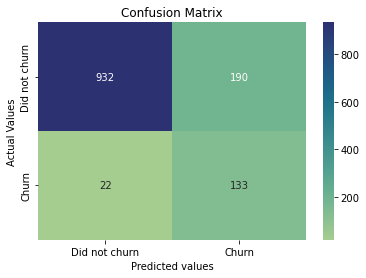

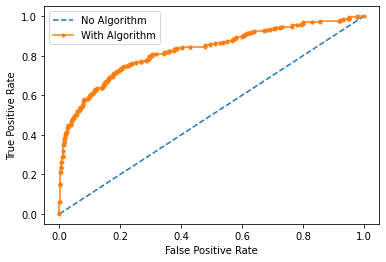

In [201]:
param_grid={
    'model__n_estimators':[300, 500], 
    'model__criterion':['gini'],
    'model__max_depth':[6, 8],
    'model__max_features':[10],
#     'model__class_weight':[{0: 1, 1: 1.1}, {0: 1, 1: 1.5}, {0: 1, 1: 2}]
}
rfc = RandomForestClassifier(random_state=2)
evaluate_build_model(rfc, param_grid)

## XGBoost

Fitting 5 folds for each of 4 candidates, totalling 20 fits
The best parameters are: {'model__learning_rate': 0.01, 'model__max_depth': 4, 'model__n_estimators': 300, 'model__objective': 'binary:logistic', 'model__scale_pos_weight': 1}
The best score on training set is: 0.8360760621853025
Accuracy on test set:  0.8300704776820673
ROC Score:  0.8293059693258302
The classification scores are:
              precision    recall  f1-score   support

       False       0.98      0.83      0.90      1133
        True       0.39      0.87      0.54       144

    accuracy                           0.83      1277
   macro avg       0.68      0.85      0.72      1277
weighted avg       0.91      0.83      0.86      1277



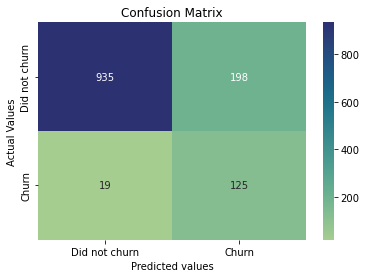

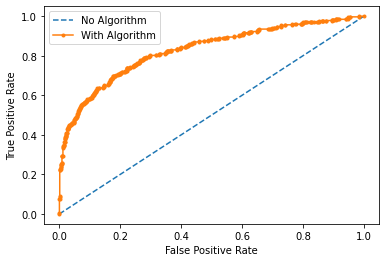

In [216]:
param_grid={
    'model__n_estimators':[300], 
    'model__max_depth':[4,6],
    'model__learning_rate':[0.01],
    'model__scale_pos_weight':[1, 2],
    'model__objective':['binary:logistic']
}
xgb = XGBClassifier(random_state=2)
evaluate_build_model(xgb, param_grid)

## Gradient Boosting

Fitting 5 folds for each of 8 candidates, totalling 40 fits
The best parameters are: {'model__criterion': 'squared_error', 'model__learning_rate': 0.05, 'model__max_features': 11, 'model__n_estimators': 300, 'model__subsample': 0.9}
The best score on training set is: 0.840187759592587
Accuracy on test set:  0.8347689898198903
ROC Score:  0.8359814630916915
The classification scores are:
              precision    recall  f1-score   support

       False       0.96      0.84      0.90      1085
        True       0.47      0.79      0.59       192

    accuracy                           0.83      1277
   macro avg       0.71      0.82      0.74      1277
weighted avg       0.88      0.83      0.85      1277



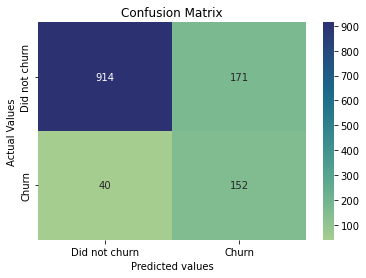

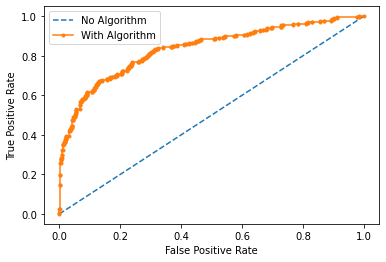

In [220]:
param_grid={
    'model__n_estimators':[300], 
    'model__criterion':['squared_error'],
    'model__learning_rate':[0.01, 0.05],
    'model__max_features':[11,15],
    'model__subsample':[0.9, 0.7],
}
gb = GradientBoostingClassifier(random_state=2)
evaluate_build_model(gb, param_grid)

## Feature Importance

In [320]:
gb = GradientBoostingClassifier(random_state=2, n_estimators=300, criterion='squared_error', learning_rate=0.05,
                               max_features=11, subsample=0.9)
pipe = Pipeline([('scaler',StandardScaler()), ('gb', gb)])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('gb',
                 GradientBoostingClassifier(criterion='squared_error',
                                            learning_rate=0.05, max_features=11,
                                            n_estimators=300, random_state=2,
                                            subsample=0.9))])

In [321]:
sort_indices = gb.feature_importances_.argsort()
X_train.columns[sort_indices]

Index(['Balance>Salary', 'France', 'Age_group_60s', 'Spain', 'Age_group_20s',
       'Satisfaction Score', 'Male', 'Age_group_40s', 'Female',
       'Age_group_30s', 'Loyalty', 'Age_group_50s', 'log_EstimatedSalary',
       'EstimatedSalary', 'Point Earned', 'Germany', 'log_Balance',
       'IsActiveMember', 'NumOfProducts', 'Age'],
      dtype='object')

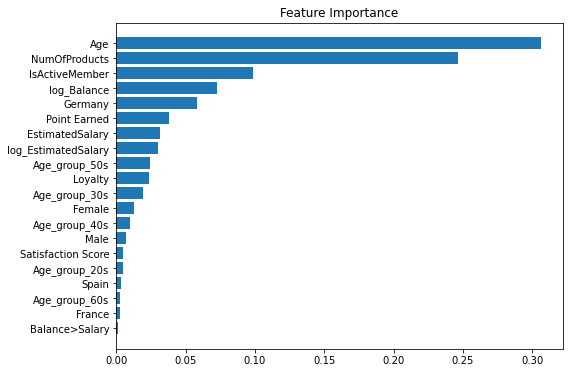

In [322]:
plt.figure(figsize=(8,6))
plt.title("Feature Importance")
plt.barh(range(X_train.shape[1]), gb.feature_importances_[sort_indices])
plt.yticks(range(X_train.shape[1]), X_train.columns[sort_indices], rotation=0)
plt.show()

In [323]:
feat_df = pd.DataFrame({'value':gb.feature_importances_,'feature':X_train.columns})
feat_df

,value,feature
0,0.098375,IsActiveMember
1,0.012495,Female
2,0.007092,Male
3,0.002649,France
4,0.058510,Germany
5,0.003346,Spain
6,0.004544,Age_group_20s
7,0.019563,Age_group_30s
8,0.010181,Age_group_40s
9,0.024372,Age_group_50s


In [324]:
sig_feat = feat_df.loc[feat_df['value']>0.05].feature.to_list()
sig_feat

['IsActiveMember', 'Germany', 'Age', 'NumOfProducts', 'log_Balance']

In [325]:
X = model_df[sig_feat]
y = model_df['Complain']

## Polynomial Transformation

In [326]:
X.dtypes

IsActiveMember      int64
Germany             int64
Age                 int64
NumOfProducts       int64
log_Balance       float64
dtype: object

In [327]:
num_X = X[X.columns[-3:]]

In [328]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
df_poly = poly.fit_transform(num_X)
df_poly = pd.DataFrame(df_poly, columns=poly.get_feature_names_out())

In [329]:
polyX = pd.concat([df_poly.reset_index(drop=True), X[X.columns[:2]].reset_index(drop=True)], axis=1)
polyX

,1,Age,NumOfProducts,log_Balance,Age^2,Age NumOfProducts,Age log_Balance,NumOfProducts^2,NumOfProducts log_Balance,log_Balance^2,IsActiveMember,Germany
0,1.0,41.0,1.0,-1.142312,1681.0,41.0,-46.834807,1.0,-1.142312,1.304878,1,0
1,1.0,42.0,3.0,1.145961,1764.0,126.0,48.130373,9.0,3.437884,1.313227,0,0
2,1.0,43.0,1.0,0.291541,1849.0,43.0,12.536264,1.0,0.291541,0.084996,1,0
3,1.0,44.0,2.0,-0.057591,1936.0,88.0,-2.534020,4.0,-0.115183,0.003317,0,0
4,1.0,29.0,4.0,-0.017527,841.0,116.0,-0.508292,16.0,-0.070109,0.000307,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6378,1.0,53.0,1.0,-0.953674,2809.0,53.0,-50.544737,1.0,-0.953674,0.909495,0,0
6379,1.0,28.0,1.0,1.042161,784.0,28.0,29.180512,1.0,1.042161,1.086100,0,0
6380,1.0,35.0,1.0,-2.487929,1225.0,35.0,-87.077520,1.0,-2.487929,6.189791,1,0
6381,1.0,42.0,2.0,-1.532973,1764.0,84.0,-64.384857,4.0,-3.065946,2.350006,0,1


In [330]:
X_train, X_test, y_train, y_test = train_test_split(polyX, y, test_size=.2, random_state=2)
X_train.shape

(5106, 12)

In [335]:
def evaluate_build_model(model_name, parameters):
    pipe = build_model(model_name, parameters)
    print('The best parameters are:', pipe.best_params_)
    print('The best score on training set is:', pipe.best_score_)
    pos_probs = pipe.predict_proba(X_test)[:, 1]
    y_hat = (pos_probs>0.55)
    test_acc = accuracy_score(y_hat, y_test)
    roc_score = roc_auc_score(y_test, pos_probs)
    print('Accuracy on test set: ', test_acc)
    print('ROC Score: ', roc_score)
    print('The classification scores are:')
    print(classification_report(y_hat, y_test))
    plot_cm(y_hat)
    plot_roc_curve(pos_probs)
    rmse = np.sqrt(mean_squared_error(y_hat, y_test))
    scores['val_score'].append(pipe.best_score_)
    scores['test_score'].append(test_acc)
    scores['rmse'].append(rmse)
    scores['roc_score'].append(roc_score)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
The best parameters are: {'model__criterion': 'squared_error', 'model__learning_rate': 0.05, 'model__max_features': 15, 'model__n_estimators': 300, 'model__subsample': 0.7}
The best score on training set is: 0.8358809424780203
Accuracy on test set:  0.8386844166014096
ROC Score:  0.843065859246711
The classification scores are:
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      1098
           1       0.46      0.83      0.59       179

    accuracy                           0.84      1277
   macro avg       0.71      0.83      0.74      1277
weighted avg       0.90      0.84      0.86      1277



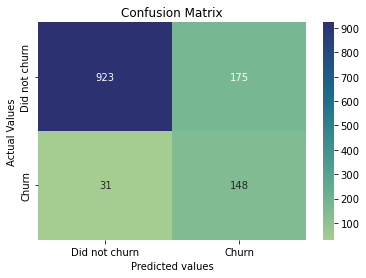

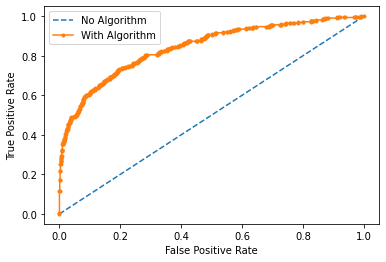

In [331]:
param_grid={
    'model__n_estimators':[300], 
    'model__criterion':['squared_error'],
    'model__learning_rate':[0.01, 0.05],
    'model__max_features':[11,15],
    'model__subsample':[0.9, 0.7],
}
gb = GradientBoostingClassifier(random_state=2)
evaluate_build_model(gb, param_grid)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
The best parameters are: {'model__class_weight': {0: 1, 1: 1}, 'model__criterion': 'gini', 'model__max_depth': 6, 'model__max_features': 10, 'model__n_estimators': 500}
The best score on training set is: 0.8386227768716061
Accuracy on test set:  0.8347689898198903
ROC Score:  0.832943902486516
The classification scores are:
              precision    recall  f1-score   support

       False       0.98      0.83      0.90      1135
        True       0.39      0.89      0.55       142

    accuracy                           0.83      1277
   macro avg       0.69      0.86      0.72      1277
weighted avg       0.92      0.83      0.86      1277



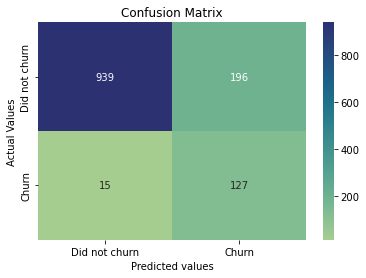

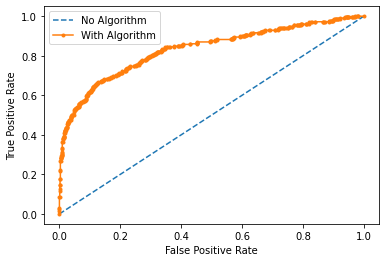

In [336]:
param_grid={
    'model__n_estimators':[300, 500], 
    'model__criterion':['gini'],
    'model__max_depth':[6],
    'model__max_features':[10],
    'model__class_weight':[{0: 1, 1: 1.1}, {0: 1, 1: 1}]
}
rfc = RandomForestClassifier(random_state=2)
evaluate_build_model(rfc, param_grid)